# Introduction to the TED Talks dataset

https://www.kaggle.com/rounakbanik/ted-talks

In [41]:
import pandas as pd
import numpy as np

In [42]:
ted = pd.read_csv('ted_main.csv')

In [43]:
# each row represents a single talk
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [44]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

## 1. איזו הרצאה גררה את הדיון הרחב ביותר?

In [45]:
# correct for this bias by calculating the number of comments per view
ted['comments_per_view'] = ted['comments'] / ted['views']

In [46]:
# interpretation: for every view of the same-sex marriage talk, there are 0.002 comments
ted.set_index('title')['comments_per_view'].idxmax()

'The case for same-sex marriage'

Lessons:

1. Consider the limitations and biases of your data when analyzing it
2. Make your results understandable

## 2. הצג באופן ויזואלי את התפלגות כמות התגובות

<AxesSubplot:>

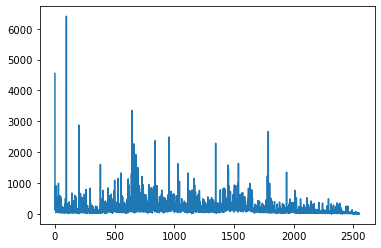

In [47]:
# line plot is not appropriate here (use it to measure something over time)
ted.comments.plot()

<AxesSubplot:ylabel='Frequency'>

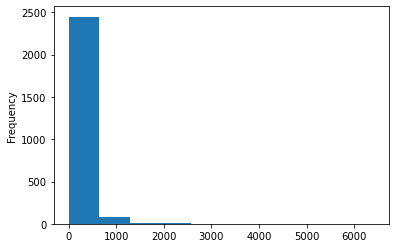

In [48]:
# histogram shows the frequency distribution of a single numeric variable
ted.comments.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

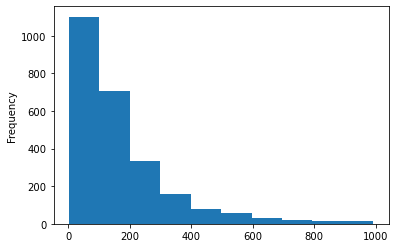

In [49]:
# modify the plot to be more informative
ted[ted['comments'] < 1000]['comments'].plot(kind='hist')

In [50]:
# check how many observations we removed from the plot
ted[ted['comments'] >= 1000].shape

(32, 18)

<AxesSubplot:ylabel='Frequency'>

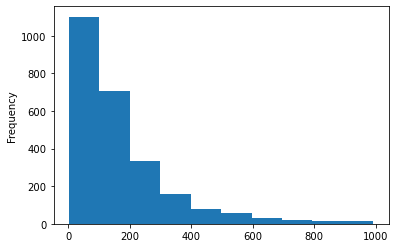

In [51]:
# can also write this using the query method
ted.query('comments < 1000')['comments'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

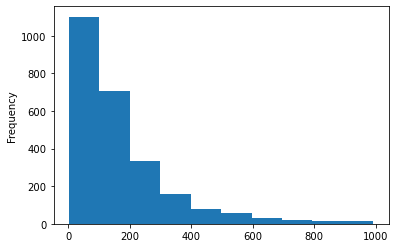

In [52]:
# can also write this using the loc accessor
ted.loc[ted['comments'] < 1000, 'comments'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

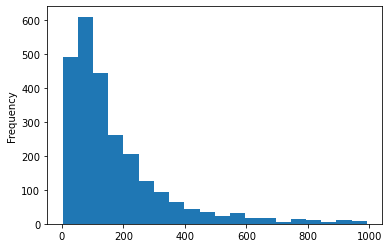

In [53]:
# increase the number of bins to see more detail
ted.loc[ted['comments'] < 1000, 'comments'].plot(kind='hist', bins=20)

<AxesSubplot:>

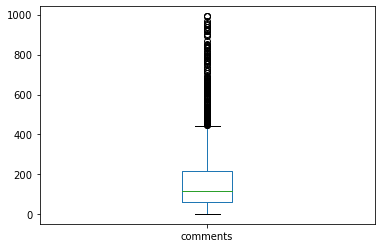

In [54]:
# boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers
ted.loc[ted['comments'] < 1000, 'comments'].plot(kind='box')

Lessons:

1. Choose your plot type based on the question you are answering and the data type(s) you are working with
2. Use pandas one-liners to iterate through plots quickly
3. Try modifying the plot defaults
4. Creating plots involves decision-making

## 4. הצג באופן ויזואלי את מספר ההרצאות שהתרחשו בכל שנה
Bonus exercise: calculate the average delay between filming and publishing

In [55]:
# event column does not always include the year
ted['event'].sample(10)

1844              TEDMED 2014
549                   TED2009
2546                  TED2017
59                    TED2005
1841             TED@Unilever
2444    TEDLagos Ideas Search
1117          TEDSalon NY2011
656                   TED2010
1094             TEDxCanberra
311                   TED2008
Name: event, dtype: object

In [56]:
# dataset documentation for film_date says "Unix timestamp of the filming"
ted['film_date'].head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [57]:
# results don't look right
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

[pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [58]:
# now the results look right
pd.to_datetime(ted['film_date'], unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [59]:
ted['film_datetime'] = pd.to_datetime(ted['film_date'], unit='s')

In [60]:
# verify that event name matches film_datetime for a random sample
ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
40,TED2005,2005-02-17
401,TED2009,2009-02-06
2347,TEDWomen 2016,2016-10-27
2140,TEDxCreativeCoast,2015-05-01
1678,TED@State Street Boston,2013-11-26


In [61]:
# new column uses the datetime data type (this was an automatic conversion)
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
film_datetime         datetime64[ns]
dtype: object

In [62]:
# datetime columns have convenient attributes under the dt namespace
ted['film_datetime'].dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [63]:
# similar to string methods under the str namespace
ted['event'].str.lower().head()

0    ted2006
1    ted2006
2    ted2006
3    ted2006
4    ted2006
Name: event, dtype: object

In [64]:
# count the number of talks each year using value_counts()
ted['film_datetime'].dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

<AxesSubplot:>

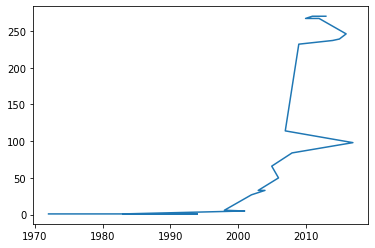

In [65]:
# points are plotted and connected in the order you give them to pandas
ted['film_datetime'].dt.year.value_counts().plot()

<AxesSubplot:>

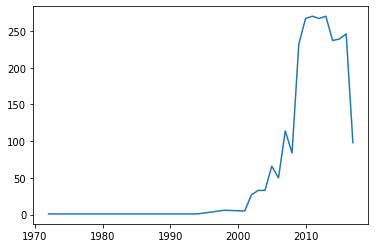

In [66]:
# need to sort the index before plotting
ted['film_datetime'].dt.year.value_counts().sort_index().plot()

In [67]:
# we only have partial data for 2017
ted['film_datetime'].max()

Timestamp('2017-08-27 00:00:00')

Lessons:

1. Read the documentation
2. Use the datetime data type for dates and times
3. Check your work as you go
4. Consider excluding data if it might not be relevant

## 5. מה היו האירועים הטובים ביותר בהיסטוריה של טד?

In [68]:
# count the number of talks (great if you value variety, but they may not be great talks)
ted['event'].value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [69]:
# use views as a proxy for "quality of talk"
ted.groupby('event')['views'].mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [70]:
# find the largest values, but we don't know how many talks are being averaged
ted.groupby('event')['views'].mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [71]:
# show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)
ted.groupby('event')['views'].agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [72]:
# calculate the total views per event
ted.groupby('event')['views'].agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


Lessons:

1. Think creatively for how you can use the data you have to answer your question
2. Watch out for small sample sizes